***Задача***

В проектируемой локальной сети есть заданное количество компьютеров.
Есть расстояния от каждого компьютера до сервера и до остальных компьютеров. Маршрутизаторы соединяются с сервером через оптоволокно стоимостью 12 р/м, а компьютеры - с маршрутизаторами соединяются через витую пару стоимостью 30 р/м.
Каждый маршрутизатор имеет 8 портов для витой пары и один оптический порт.
Сервер имеет неограниченное число оптических портов и портов для витой пары. Компьютер может соединяться с сервером напрямую или через маршрутизатор.

***Задание***

1. Построить ЦФ для расчёта стоимости оборудования ЛВС в общем виде. Учесть стоимость маршрутизатора, обоснованность его установки.
2. Построить поверхность стоимости от сумм расстояний для конкретного примера. Количество компьютеров — больше двух, располагаются не на одной линии в одной четверти относительно сервера.*

In [1]:
import numpy as np              
import matplotlib.pyplot as plt 
import seaborn as sns
import math
from collections import Counter

In [2]:
server_location = (7,13)
computers_number = 100
optical_fiber_price = 12     # rubles per metre (to connect routers with the server)
t_wire_price = 30            # rubles per metre (to connect PCs with routers)
routers_ports_number = 8     # (to connect PCs with routers)
computers_location = []

#create computers location
for i in range(computers_number):
    
    h = 2
    v = 2
    
    if i == 0:
        x = np.random.randint(1,30)
        y = np.random.randint(1,30)
             
    elif i%3 == 0:
        y = y + v
        x = x - 2*h
        
    else:
        x = x + h
    
    computers_location.append((x, y))
        
    
computers_location = np.array(computers_location)

**Option #1**

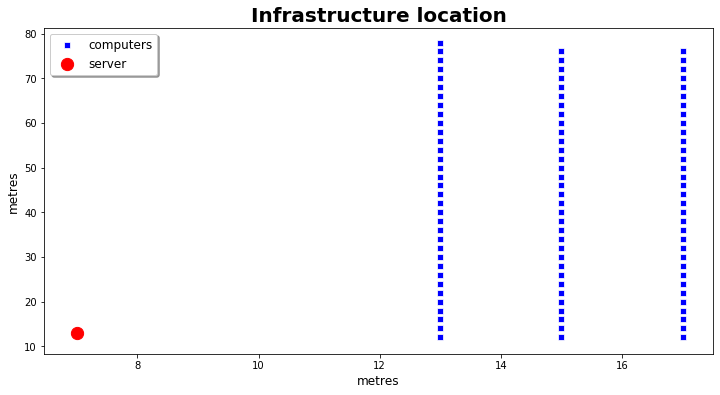

In [3]:
#Vizualize 
plt.figure(figsize = (12,6))
sns.scatterplot(x=computers_location.T[0], y=computers_location.T[1], color = 'b', label = "computers",marker="s")
plt.scatter(server_location[0], server_location[1], color = 'r', label = "server", s=150)
plt.title("Infrastructure location", fontweight='bold', fontsize= 20 )
plt.legend(shadow=True, fontsize= 12)
plt.xlabel("metres",fontsize= 12)
plt.ylabel("metres",fontsize= 12)
plt.show()

In [4]:
price_without_routers = 0

for x,y in computers_location:
    distance = np.sqrt(((server_location[0]-x)**2)+((server_location[1]-y)**2))
    price_without_routers += distance * t_wire_price

print(f'Стоимость подключения компьютеров напрямую = {round(price_without_routers,0)} руб.') 

Стоимость подключения компьютеров напрямую = 99659.0 руб.


**Option #2**

In [5]:
routers_number = math.ceil(computers_number/routers_ports_number)
routers_number

13

In [43]:
first_coordinate = computers_location[0]
routers_location_d = {}

for c in np.linspace(2,3,11):
    c = round(c,1)
    routers_location_e = [] 
    for i in range(computers_number):
        if i % routers_ports_number == 0:
            x = server_location
            y = computers_location[i]   
            routers_location_e.append(((x[0] + y[0]) / c, (x[1] + y[1])/c))
            
    routers_location_d[c] = (routers_location_e)  

In [7]:
#the price for the router to server section
router_server_price_dict = {}
PC_router_price_dict = {}

#remoteness coefficients 
keys_reversed=np.linspace(3,2,11).tolist()

#the price for the router to server section

for key, routers_location in routers_location_d.items():
    router_server_price = 0
    for x,y in routers_location:
        distance = np.sqrt(((server_location[0] - x)**2) + ((server_location[1] - y)**2))
        router_server_price += distance * optical_fiber_price
    router_server_price_dict [key] = router_server_price

#the price for the router to computers section

for key, routers_location in routers_location_d.items():
    PC_router_price = 0
    i = 0 
    for x,y in routers_location:
        for x_r, y_r in computers_location:
            i+=1
        
            if i % routers_ports_number == 0:
                distance = np.sqrt(((x - x_r)**2) + ((y - y_r)**2))
                PC_router_price += distance * t_wire_price
                break
            distance = np.sqrt(((x_r - x)**2) + ((y_r - y)**2))
            PC_router_price += distance * t_wire_price
    PC_router_price_dict [round(keys_reversed.pop(0),1)] = PC_router_price
    
    
price_with_routers = dict(Counter(PC_router_price_dict) + Counter(router_server_price_dict )) 

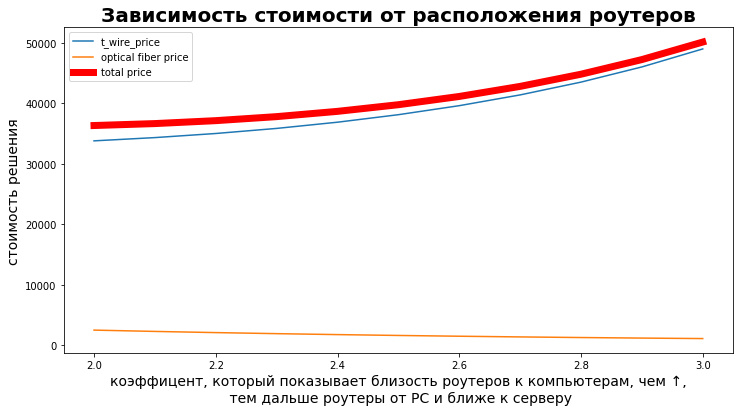

In [29]:
plt.figure(figsize = (12,6))
plt.plot([*router_server_price_dict.keys()], sorted([*PC_router_price_dict.values()]), label = "t_wire_price")
plt.plot([*router_server_price_dict.keys()] , [*router_server_price_dict.values()], label = "optical fiber price")
plt.plot([*price_with_routers.keys()] , [*price_with_routers.values()], label = "total price", color = "r", linewidth = 7)
plt.xlabel(f"коэффицент, который показывает близость роутеров к компьютерам, чем ↑,\n тем дальше роутеры от PC и ближе к серверу", fontsize= 14)
plt.ylabel("стоимость решения", fontsize= 14)
plt.title("Зависимость стоимости от расположения роутеров", fontweight='bold', fontsize= 20)
plt.legend()
plt.show()

In [40]:
min_value = min(price_with_routers.values())
best = {key for key, value in price_with_routers.items() if value == min_value}
print(f'Итоговая лучшая цена для решения № {best.pop()} с использованием маршрутизаторов = {round(min_value,0)} руб.')

Итоговая лучшая цена для решения № 2.0 с использованием маршрутизаторов = 36357.0 руб.


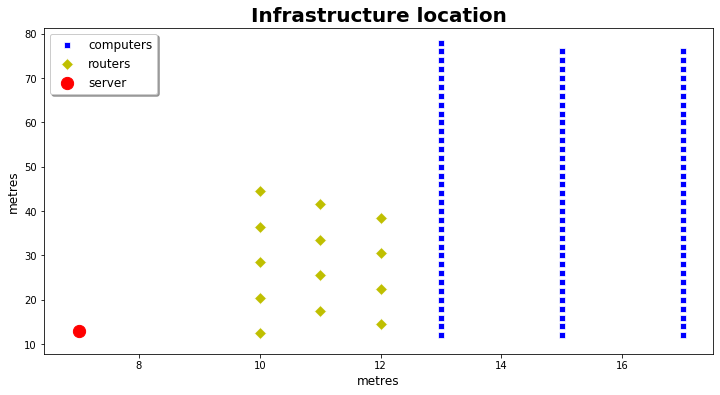

In [41]:
#Vizualize 
plt.figure(figsize = (12,6))
sns.scatterplot(x=computers_location.T[0], y=computers_location.T[1], color = 'b', label = "computers",marker="s")
sns.scatterplot(x=np.array(routers_location_d[2.0]).T[0], y=np.array(routers_location_d[2.0]).T[1], color = 'y', label = "routers", s=70, marker="D")
plt.scatter(server_location[0], server_location[1], color = 'r', label = "server", s=150)
plt.title("Infrastructure location", fontweight='bold', fontsize= 20 )
plt.legend(shadow=True, fontsize= 12)
plt.xlabel("metres",fontsize= 12)
plt.ylabel("metres",fontsize= 12)
plt.show()